In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'



In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
uploaded = files.upload()

df = pd.read_csv('money_ball')

Saving money_ball.csv to money_ball (1).csv


FileNotFoundError: ignored

In [ ]:
df=df.drop(['Playoffs', 'RankSeason', 'RankPlayoffs'], axis=1)
df['Run_Differential'] = df['RS'] - df['RA']

In [ ]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG,Run_Differential
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,162,0.335,0.424,-146


In [ ]:
target = 'W'
y_train = df[target]
y_test = df[target]

In [ ]:
print('Mean Baseline (using 0 features)')
guess = y_train.mean()
print(guess)

Mean Baseline (using 0 features)
80.90422077922078


In [ ]:
df=df.drop(['OOBP', 'OSLG'], axis=1)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Asbsolute Error: {mae} games')

Mean Asbsolute Error: 9.381598920559961 games


(0, 162)

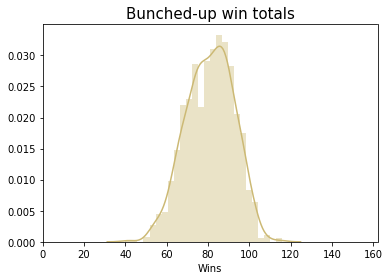

In [ ]:
y = df['W']
import matplotlib.pyplot as plt
# sns.distplot(y);

sns.set_color_codes()
ax = sns.distplot(y, color="y")
plt.xlabel('Wins')
plt.title("Bunched-up win totals", fontsize=15)
plt.xlim(0,162)



In [ ]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,G,Run_Differential
Year,1.000000e+00,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.009287,2.182660e-18
RS,4.189775e-01,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.075195,5.462938e-01
RA,4.120202e-01,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.023369,-5.670477e-01
W,4.138248e-03,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.105309,9.378511e-01
OBP,3.743545e-01,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.016563,5.063794e-01
SLG,5.360371e-01,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.036770,4.228647e-01
BA,3.493972e-01,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.019886,4.369427e-01
G,9.286806e-03,0.075195,-0.023369,0.105309,0.016563,0.036770,0.019886,1.000000,8.812638e-02
Run_Differential,2.182660e-18,0.546294,-0.567048,0.937851,0.506379,0.422865,0.436943,0.088126,1.000000e+00


In [ ]:
train = df[df['Year'] < 2004]
test = df[df['Year'] > 2003]

In [ ]:
val = train[train['Year'] > 1991]

In [ ]:
train = train[train['Year'] <= 1991]

In [ ]:
train.shape, val.shape, test.shape

((672, 11), (290, 11), (270, 11))

In [ ]:
!pip install category_encoders==2.*

In [ ]:
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import cross_val_score

model = LinearRegression()
target = 'W'
features = ['G', 'Run_Differential']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    LinearRegression()
)


In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

In [ ]:
mae = (y_pred - y_val).abs().mean()

In [ ]:
(f'Validation Mean Asbsolute Error: {mae:,.0f} games')

'Validation Mean Asbsolute Error: 3 games'

In [ ]:
y_pred = pipeline.predict(X_test)
mae = (y_pred - y_test).abs().mean()

In [ ]:
(f'Test Mean Asbsolute Error: {mae:,.0f} games')

'Test Mean Asbsolute Error: 3 games'

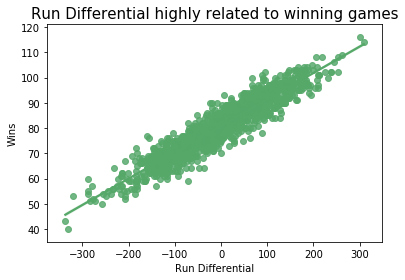

In [ ]:
import matplotlib.pyplot as plt

df.plot.scatter('Run_Differential', 'W', alpha=.1);
ax = sns.regplot(x="Run_Differential", y="W", color='g', data=df)
plt.xlabel('Run Differential')
plt.ylabel('Wins')
plt.title("Run Differential highly related to winning games", fontsize=15)

plt.show()

In [ ]:
!pip install category_encoders==2.*

In [ ]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.884213522052249


In [ ]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.8675241973032022


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt

feature = 'Run_Differential'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

In [ ]:
coefficients = lr.named_steps['linearregression'].coef_
print(pd.Series(coefficients, features))

intercept= lr.named_steps['linearregression'].intercept_

print (intercept)

G                   0.409497
Run_Differential    0.108031
dtype: float64
14.564949724013502


In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt

feature = 'Run_Differential'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


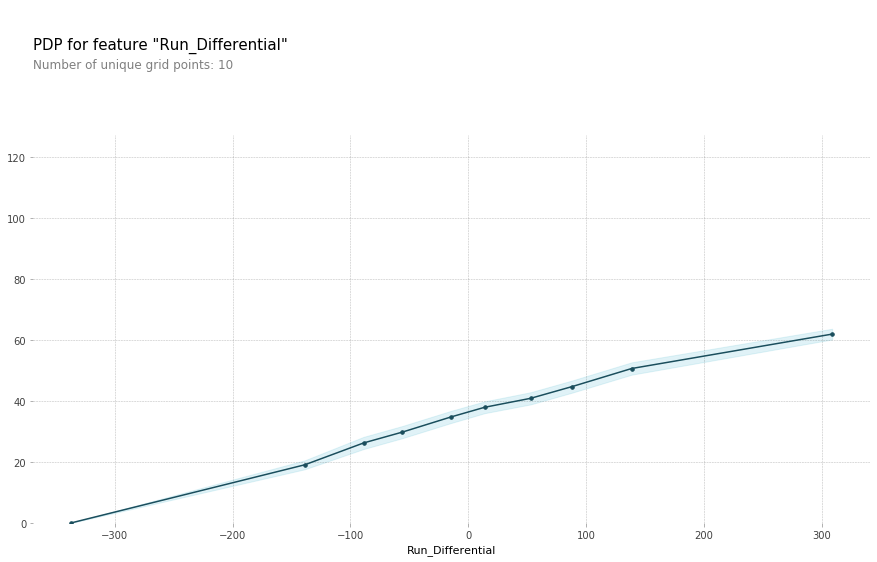

In [ ]:
pdp_plot(isolated, feature_name=feature);

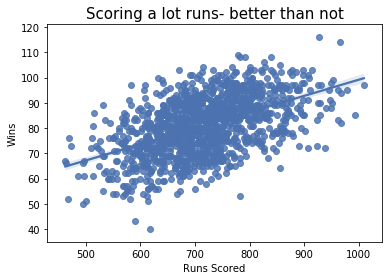

In [ ]:
df.plot.scatter('RS', 'W', alpha=.1);
ax = sns.regplot(x="RS", y="W", color='b', data=df)
plt.xlabel('Runs Scored')
plt.ylabel('Wins')
plt.title('Scoring a lot runs- better than not', fontsize=15)

plt.show()

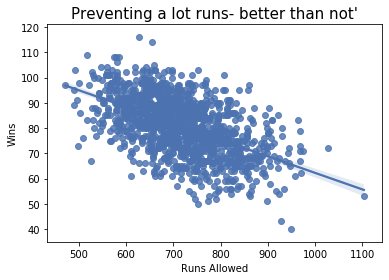

In [ ]:
df.plot.scatter('RA', 'W', alpha=.1);
ax = sns.regplot(x="RA", y="W", color='b', data=df)
plt.xlabel('Runs Allowed')
plt.ylabel('Wins')
plt.title("Preventing a lot runs- better than not", fontsize=15)

plt.show()

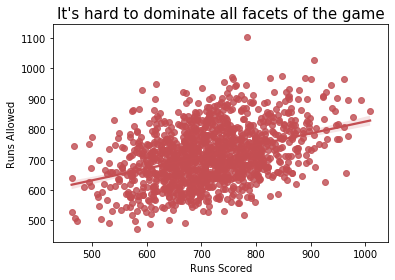

In [ ]:
df.plot.scatter('RS', 'RA', alpha=.1);
ax = sns.regplot(x="RS", y="RA", color='r', data=df)
plt.xlabel('Runs Scored')
plt.ylabel('Runs Allowed')
plt.title("It's hard to dominate all facets of the game", fontsize=15)

plt.show()